In [74]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.stats as sp
import scipy.optimize as opt
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [3]:
product=input('Enter the product : ')

Enter the product : Chairs


In [4]:
file = pd.ExcelFile("sales.xls")
churndf=file.parse("Orders")
fdf=file.parse("Returns")
churndf[~churndf.isin(fdf)].dropna()
churn_df=churndf.loc[churndf["Sub-Category"]==product]
churn_df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,0.0,219.5820
23,24,US-2017-156909,2017-07-16,2017-07-18,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.372,2,0.3,-1.0196
39,40,CA-2015-117415,2015-12-27,2015-12-31,Standard Class,SN-20710,Steve Nguyen,Home Office,United States,Houston,...,77041,Central,FUR-CH-10004218,Furniture,Chairs,"Global Fabric Manager's Chair, Dark Gray",212.058,3,0.3,-15.1470
52,53,CA-2015-115742,2015-04-18,2015-04-22,Standard Class,DP-13000,Darren Powers,Consumer,United States,New Albany,...,47150,Central,FUR-CH-10003061,Furniture,Chairs,"Global Leather Task Chair, Black",89.990,1,0.0,17.0981
57,58,CA-2016-111682,2016-06-17,2016-06-18,First Class,TB-21055,Ted Butterfield,Consumer,United States,Troy,...,12180,East,FUR-CH-10003968,Furniture,Chairs,Novimex Turbo Task Chair,319.410,5,0.1,7.0980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9893,9894,US-2016-115441,2016-07-25,2016-07-28,Second Class,SH-19975,Sally Hughsby,Corporate,United States,Milwaukee,...,53209,Central,FUR-CH-10004626,Furniture,Chairs,Office Star Flex Back Scooter Chair with Alumi...,403.560,4,0.0,96.8544
9907,9908,US-2015-129007,2015-09-13,2015-09-15,First Class,KD-16615,Ken Dana,Corporate,United States,Anaheim,...,92804,West,FUR-CH-10000155,Furniture,Chairs,Global Comet Stacking Armless Chair,717.720,3,0.2,71.7720
9912,9913,CA-2015-132388,2015-10-10,2015-10-12,First Class,KN-16390,Katherine Nockton,Corporate,United States,Santa Barbara,...,93101,West,FUR-CH-10001714,Furniture,Chairs,"Global Leather & Oak Executive Chair, Burgundy",362.136,3,0.2,-54.3204
9919,9920,CA-2016-149272,2016-03-15,2016-03-19,Standard Class,MY-18295,Muhammed Yedwab,Corporate,United States,Bryan,...,77803,Central,FUR-CH-10000863,Furniture,Chairs,Novimex Swivel Fabric Task Chair,528.430,5,0.3,-143.4310


In [5]:
cdf = churn_df[['Order ID','Order Date','Sub-Category','Sales','Profit']]
cdf


,Order ID,Order Date,Sub-Category,Sales,Profit
1,CA-2016-152156,2016-11-08,Chairs,731.940,219.5820
23,US-2017-156909,2017-07-16,Chairs,71.372,-1.0196
39,CA-2015-117415,2015-12-27,Chairs,212.058,-15.1470
52,CA-2015-115742,2015-04-18,Chairs,89.990,17.0981
57,CA-2016-111682,2016-06-17,Chairs,319.410,7.0980
...,...,...,...,...,...
9893,US-2016-115441,2016-07-25,Chairs,403.560,96.8544
9907,US-2015-129007,2015-09-13,Chairs,717.720,71.7720
9912,CA-2015-132388,2015-10-10,Chairs,362.136,-54.3204
9919,CA-2016-149272,2016-03-15,Chairs,528.430,-143.4310


In [6]:
d1=cdf['Sub-Category'].value_counts()
d1

Chairs    617
Name: Sub-Category, dtype: int64

In [9]:
cdf['Order Date'] = pd.to_datetime(cdf['Order Date'])
cdf.index = cdf['Order Date']
cdf = cdf.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(cdf)),columns=['Order Date', 'Sales'])
for i in range(0,len(cdf)):
    new_data['Order Date'][i] = cdf['Order Date'][i]
    new_data['Sales'][i] = cdf['Sales'][i]
new_data

,Order Date,Sales
0,2014-01-06 00:00:00,2573.82
1,2014-01-13 00:00:00,545.94
2,2014-01-20 00:00:00,1067.94
3,2014-02-11 00:00:00,60.89
4,2014-02-12 00:00:00,129.568
...,...,...
612,2017-12-28 00:00:00,113.372
613,2017-12-29 00:00:00,300.98
614,2017-12-29 00:00:00,393.568
615,2017-12-29 00:00:00,258.75


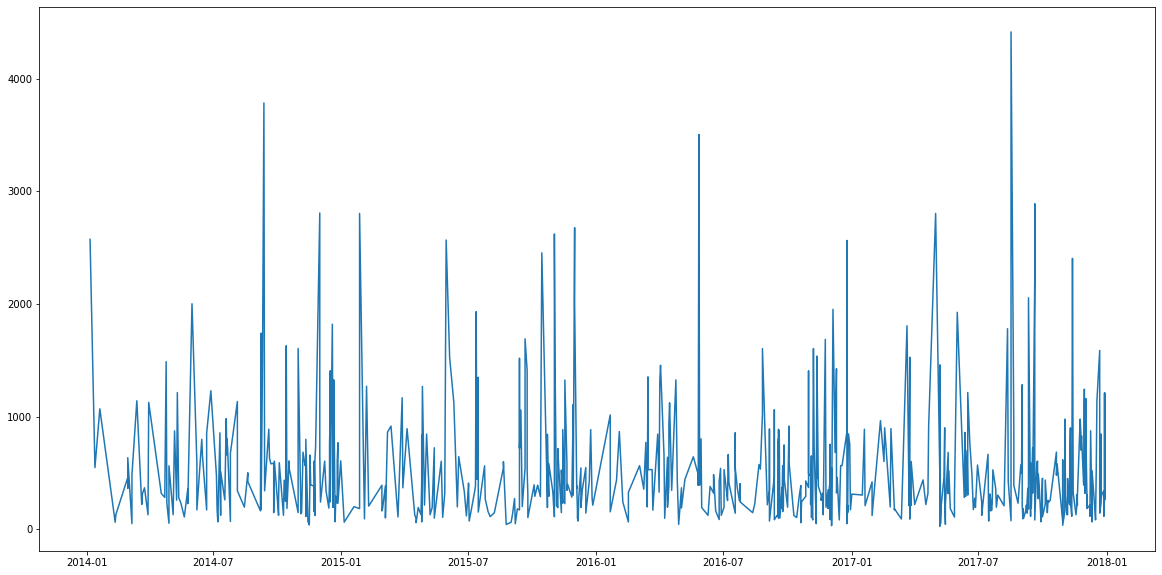

In [62]:
#plot
plt.figure(figsize=(20,10))
plt.plot(cdf['Sales'], label='Sales history')

In [141]:
y=np.array(cdf['Sales'].dropna().values, dtype=float)
x=np.array(pd.to_datetime(cdf['Order Date'].dropna()).index.values, dtype=float)
slope, intercept, r_value, p_value, std_err =sp.linregress(x,y)
acc = str((r_value**2) * 100) + '%'
print(acc)
xf = np.linspace(min(x),max(x),100)
xf1 = xf.copy()
xf1 = pd.to_datetime(xf1)
yf = (slope*xf)+intercept
print('r = ', r_value, '\n', 'p = ', p_value, '\n', 's = ', std_err)

0.36508441771341116%
r =  -0.060422215923732155 
 p =  0.1338261114683375 
 s =  6.069497350820912e-16


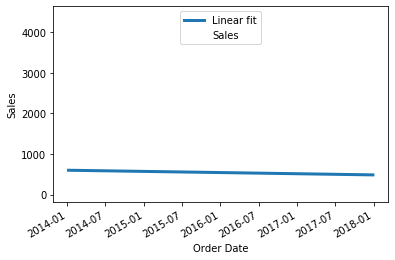

In [140]:
f, ax = plt.subplots(1, 1)
ax.plot(xf1, yf,label='Linear fit', lw=3)
cdf['Sales'].dropna().plot(ax=ax, ls='')
plt.ylabel('Sales')
ax.legend();

In [133]:
y1=yf[0]
y2=yf[96]
x1=pd.to_datetime(xf1[0])
x2=pd.to_datetime(xf1[96])
x=pd.to_datetime('2018-05-26')

from datetime import date
delta = x2-x1
dayss=delta.days
m=(y2-y1)/dayss
delta=x-x1
da=delta.days
y=m*da+y1
y

472.0034280278118

In [88]:
X = np.asarray(cdf[['Order Date']])
X

array([['2014-01-06T00:00:00.000000000'],
       ['2014-01-13T00:00:00.000000000'],
       ['2014-01-20T00:00:00.000000000'],
       ['2014-02-11T00:00:00.000000000'],
       ['2014-02-12T00:00:00.000000000'],
       ['2014-03-01T00:00:00.000000000'],
       ['2014-03-01T00:00:00.000000000'],
       ['2014-03-01T00:00:00.000000000'],
       ['2014-03-07T00:00:00.000000000'],
       ['2014-03-07T00:00:00.000000000'],
       ['2014-03-07T00:00:00.000000000'],
       ['2014-03-14T00:00:00.000000000'],
       ['2014-03-21T00:00:00.000000000'],
       ['2014-03-22T00:00:00.000000000'],
       ['2014-03-25T00:00:00.000000000'],
       ['2014-03-30T00:00:00.000000000'],
       ['2014-03-31T00:00:00.000000000'],
       ['2014-04-18T00:00:00.000000000'],
       ['2014-04-23T00:00:00.000000000'],
       ['2014-04-23T00:00:00.000000000'],
       ['2014-04-25T00:00:00.000000000'],
       ['2014-04-26T00:00:00.000000000'],
       ['2014-04-29T00:00:00.000000000'],
       ['2014-04-29T00:00:00.00000

In [89]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X

array([[-1.98081909],
       [-1.96422823],
       [-1.94763738],
       [-1.89549469],
       [-1.89312457],
       [-1.85283249],
       [-1.85283249],
       [-1.85283249],
       [-1.83861176],
       [-1.83861176],
       [-1.83861176],
       [-1.8220209 ],
       [-1.80543005],
       [-1.80305992],
       [-1.79594956],
       [-1.78409895],
       [-1.78172882],
       [-1.73906662],
       [-1.72721601],
       [-1.72721601],
       [-1.72247577],
       [-1.72010564],
       [-1.71299528],
       [-1.71299528],
       [-1.69877454],
       [-1.6940343 ],
       [-1.68692393],
       [-1.68455381],
       [-1.67981357],
       [-1.6727032 ],
       [-1.66085259],
       [-1.64900198],
       [-1.64900198],
       [-1.63478124],
       [-1.61819039],
       [-1.61819039],
       [-1.60159953],
       [-1.59922941],
       [-1.58500868],
       [-1.58500868],
       [-1.57078794],
       [-1.55182697],
       [-1.54945684],
       [-1.54708672],
       [-1.53997636],
       [-1

In [90]:
y = np.asarray(new_data[['Sales']])
y

array([[2573.82],
       [545.9399999999999],
       [1067.94],
       [60.89],
       [129.568],
       [457.56800000000004],
       [362.24999999999994],
       [634.116],
       [48.712],
       [436.70400000000006],
       [481.56800000000004],
       [1139.92],
       [218.376],
       [314.352],
       [366.786],
       [127.30199999999999],
       [1125.4879999999998],
       [317.058],
       [281.37199999999996],
       [281.37199999999996],
       [1487.04],
       [230.28000000000003],
       [51.96],
       [561.5840000000001],
       [127.869],
       [872.32],
       [256.78400000000005],
       [1212.9599999999998],
       [279.456],
       [232.88],
       [107.772],
       [359.772],
       [225.29600000000002],
       [2001.8600000000001],
       [585.552],
       [170.35200000000003],
       [797.944],
       [647.84],
       [170.058],
       [853.9299999999998],
       [1228.465],
       [478.48],
       [172.18599999999998],
       [63.882000000000005],
       [85

In [91]:
from sklearn import preprocessing
y = preprocessing.StandardScaler().fit(y).transform(y)
y

array([[ 3.71380621e+00],
       [ 2.47544567e-02],
       [ 9.74359470e-01],
       [-8.57632347e-01],
       [-7.32695617e-01],
       [-1.36008942e-01],
       [-3.09408273e-01],
       [ 1.85161299e-01],
       [-8.79786159e-01],
       [-1.73964036e-01],
       [-9.23489416e-02],
       [ 1.10530309e+00],
       [-5.71139062e-01],
       [-3.96542719e-01],
       [-3.01156533e-01],
       [-7.36817849e-01],
       [ 1.07904887e+00],
       [-3.91620054e-01],
       [-4.56538837e-01],
       [-4.56538837e-01],
       [ 1.73677223e+00],
       [-5.49483701e-01],
       [-8.73877506e-01],
       [ 5.32135004e-02],
       [-7.35786381e-01],
       [ 6.18494082e-01],
       [-5.01268507e-01],
       [ 1.23817502e+00],
       [-4.60024360e-01],
       [-5.44753868e-01],
       [-7.72346174e-01],
       [-3.13916168e-01],
       [-5.58550428e-01],
       [ 2.67331563e+00],
       [ 9.68152877e-02],
       [-6.58502723e-01],
       [ 4.83191740e-01],
       [ 2.10127543e-01],
       [-6.5

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.6, random_state=1)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (246, 1) (246, 1)
Test set: (371, 1) (371, 1)


In [93]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)
LR=LogisticRegression()
lab_enc = preprocessing.LabelEncoder()
y_test = lab_enc.fit_transform(y_test)
y_train = lab_enc.fit_transform(y_train)
LR.fit(X_train,y_train)

C:\Users\K_JAY\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
y_pred=LR.predict(X_test)
print(y_pred)

[ 42 166  42  42 166 166  42 166  42 176 166 166 166 166 166 166 176 176
  42  42  42  42 166 166  42 176  42  42 176 176  42 176 166  42  42 166
  42  42  45  42  45  42 166 166 126 166  42  42  42 166  42  42 176 176
  42  42  42 176  42 166 176 176 176 166  42 166 176 166  42  42  42 176
 166 166 176 176  42 166 166  42 176 176  42  42 166  42 166 176 176 176
 176 166  42 166  42  42 166  42  42 176 176  42 166  42 166  42 176  42
  42 176  42  42 166 176  42  42 176 166 166  42 166  42  42 176 176  42
  42 126  42 176  42 176 176 166 166  42  42 166  42  42 126 166 166 166
  45  42  42  42  42  42 176  42 166  42 166  42  42  42  42 166  42 176
 166  42 176 166  42  42 176 166 176 176 166  42  42  42 176 166  42  42
 166  42 166  42 166  45  42 166  42  42 166 166  42 176 166  42 176 126
  42 176  42  42 176  42  42 166  42 126 166 166 166 176  42  42 166 166
 166 176  42 166  42 176  42 176 166  42  42  42 166  42  42  42  42  42
  42  42 166  42 166  42 166 176  42  42  42  42  4

In [70]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       1.0
           3       0.00      0.00      0.00       1.0
           4       0.00      0.00      0.00       1.0
           5       0.00      0.00      0.00       1.0
           6       0.00      0.00      0.00       1.0
           7       0.00      0.00      0.00       1.0
           8       0.00      0.00      0.00       1.0
           9       0.00      0.00      0.00       1.0
          10       0.00      0.00      0.00       1.0
          11       0.00      0.00      0.00       1.0
          12       0.00      0.00      0.00       2.0
          13       0.00      0.00      0.00       2.0
          14       0.00      0.00      0.00       1.0
          15       0.00      0.00      0.00       1.0
          16       0.00      0.00      0.00       1.0
          17       0.00    

C:\Users\K_JAY\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:

confusion_matrix(y_test,y_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100


0.0